In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random
from statistics import mean 
%matplotlib inline

Сгенерируем выборку объёма 1000 из распределения Максвелла

In [3]:
test_rv = sts.maxwell()
sample = test_rv.rvs(1000)

Эмпирическая функция распределения для полученной выборки:

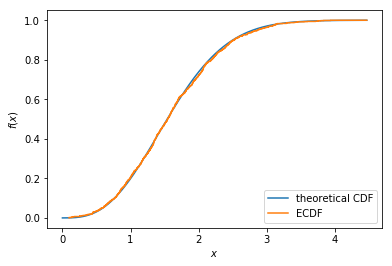

In [4]:
x = np.linspace(0,max(sample),1000)
cdf = test_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='lower right')

Гистограмма выборки, эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания, и теоретическая плотность распределения:

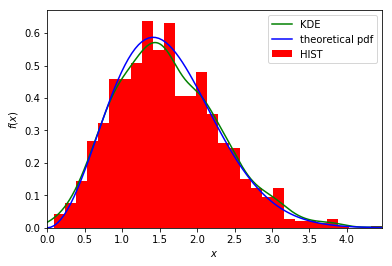

In [5]:
x = np.linspace(0,max(sample),100)

# эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания
df = pd.DataFrame({'KDE': sample})
df.plot.kde(xlim=(0,max(sample)), color='GREEN')

# тут же для наглядности гистограмму выборки
plt.hist(sample, bins=30, normed=True, label='HIST', color='RED')

# на том же графике построим теоретическую плотность распределения:
pdf = test_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', color='BLUE')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Генирируем выборки объема n = 5, 10, 50

In [6]:
ns = [5, 10, 50]
means = dict()

for n in ns:
    temp_list = []
    for _ in range(1000):
        sample = test_rv.rvs(n)
        temp_list.append(sum(sample)/n)
    means[str(n)] = (np.array(temp_list))

Посчитаем значения средних для теоритической функции распределения

In [7]:
# Теоретические средние распределения: mean - медиана, var - отклонение
mean, var = sts.maxwell.stats(moments='mv')

Для n = 5

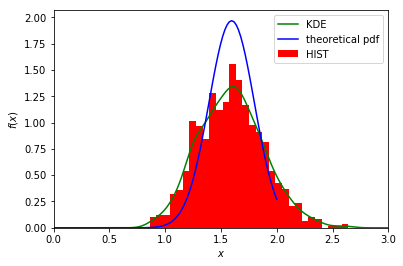

In [8]:
# Ядерное сглаживание
df = pd.DataFrame({'KDE': means['5']})
df.plot(kind='KDE',xlim=(0,3), color='GREEN')

# Гистограмма 
plt.hist(means['5'], bins=30,  normed=True, color='RED',label='HIST')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

#Так как дисперсия есть квадрат отклонения, можем записать второй параметр как отклонение на корень из n
norm_rv = sts.norm(mean, var/np.sqrt(5))
x = np.linspace(0,2,100)
pdf = norm_rv.pdf(x)
# Рисуем теоретическую фунцию плотности распределения
plt.plot(x, pdf, label='theoretical pdf', color='BLUE')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Гистограмма для n = 10

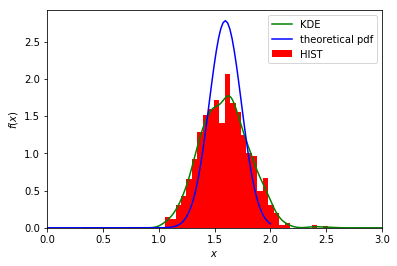

In [9]:
# Ядерное сглаживание
df = pd.DataFrame({'KDE': means['10']})
ax = df.plot(kind='KDE',xlim=(0,3), color='GREEN')

# Гистограмма 
plt.hist(means['10'], bins=30,  normed=True, color='RED',label='HIST')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

#Так как дисперсия есть квадрат отклонения, можем записать второй параметр как отклонение на корень из n
sigma = var/np.sqrt(10)
norm_rv = sts.norm(mean, sigma)
x = np.linspace(0,2,100)
pdf = norm_rv.pdf(x)
# Рисуем теоретическую фунцию плотности распределения
plt.plot(x, pdf, label='theoretical pdf', color='BLUE')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


Гистограмма для n = 50

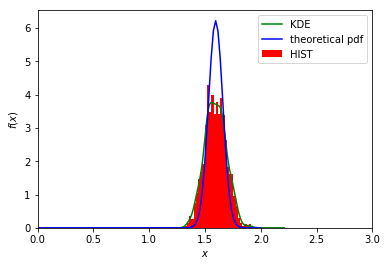

In [10]:
# Ядерное сглаживание
df = pd.DataFrame({'KDE': means['50']})
ax = df.plot(kind='KDE',xlim=(0,3), color='GREEN')

# Гистограмма 
plt.hist(means['50'], bins=30,  normed=True, color='RED',label='HIST')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

#Так как дисперсия есть квадрат отклонения, можем записать второй параметр как отклонение на корень из n
norm_rv = sts.norm(mean, var/np.sqrt(50))
x = np.linspace(0,2,100)
pdf = norm_rv.pdf(x)

# Рисуем теоретическую фунцию плотности распределения
plt.plot(x, pdf, label='theoretical pdf', color='BLUE')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### Выводы по результатам

С ростом n точность апроксимации повышалась, как видно из графиков и гистограмм. При увеличении выборки эмперическая функция плотности (KDE) приближалась к теоретической (theoretical pdf), в свою очередь все они становились более "нормальными" (т.е. приближались к нормальной функции). Таким образом, распределение выборочных средних действительно достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы.